In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
# importing required libraries
import numpy as np      # numerical operations
import pandas as pd     # dataframe handling
import seaborn as sns   # visualization
import matplotlib.pyplot as plt # visualization

import warnings         # ignore warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler    # normalizer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error   # error analysis

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet     # regression models
from sklearn.ensemble import RandomForestRegressor                              # regression model
from xgboost import XGBRegressor                                                # regression model
from sklearn.svm import SVR                                                     # regression model
from sklearn.preprocessing import PolynomialFeatures                            # regression model

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score                                      # check accuracy
from sklearn.model_selection import RandomizedSearchCV                          # hyperparameter tuning

In [44]:
# determining location of source data
import os
for dirname, _, filenames in os.walk('C:\\Users\\usman\\Documents\\UsedCarEvaluation\\carlistings.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [45]:
# importing data
df = pd.read_csv('C:\\Users\\usman\\Documents\\UsedCarEvaluation\\carlistings.csv')
df.head()

,ListingID,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Cost_Price,Sale_Price
0,2,Honda Jazz V,Islamabad,2011,46000,Petrol,Manual,First,13 km/kg,1199 CC,88.7 bhp,5,11480.0,6000.0
1,3,Subaru Forester,Islamabad,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7,NaN,8000.0
2,4,Audi A4 New 2.0 TDI Multitronic,Lahore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5,NaN,23653.0
3,6,Nissan Micra Diesel XV,Rawalpindi,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5,6000.0,4666.0
4,7,Toyota Innova Crysta 2.8 GX AT 8S,Quetta,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8,28000.0,23333.0


In [46]:
# Dropping the 'ID' column
df.drop(['ListingID'], axis=1, inplace=True)

# Display the DataFrame after dropping the column
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Cost_Price,Sale_Price
0,Honda Jazz V,Islamabad,2011,46000,Petrol,Manual,First,13 km/kg,1199 CC,88.7 bhp,5,11480.0,6000.0
1,Subaru Forester,Islamabad,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7,NaN,8000.0
2,Audi A4 New 2.0 TDI Multitronic,Lahore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5,NaN,23653.0
3,Nissan Micra Diesel XV,Rawalpindi,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5,6000.0,4666.0
4,Toyota Innova Crysta 2.8 GX AT 8S,Quetta,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8,28000.0,23333.0


In [47]:
df.columns = ['Car', 'Location', 'Year', 'ODO', 'Fuel', 'Transmission', 'Owner', 'Mileage', 'Engine', 'Power', 'Seats', 'CP', 'SP']
df.head()

,Car,Location,Year,ODO,Fuel,Transmission,Owner,Mileage,Engine,Power,Seats,CP,SP
0,Honda Jazz V,Islamabad,2011,46000,Petrol,Manual,First,13 km/kg,1199 CC,88.7 bhp,5,11480.0,6000.0
1,Subaru Forester,Islamabad,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7,NaN,8000.0
2,Audi A4 New 2.0 TDI Multitronic,Lahore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5,NaN,23653.0
3,Nissan Micra Diesel XV,Rawalpindi,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5,6000.0,4666.0
4,Toyota Innova Crysta 2.8 GX AT 8S,Quetta,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8,28000.0,23333.0


In [48]:
df = df[df['Owner'] != 'Second']
df.drop('Owner', axis=1, inplace=True)

In [49]:
df.isna().sum()

Car               0
Location          0
Year              0
ODO               0
Fuel              0
Transmission      0
Mileage           0
Engine            2
Power             2
Seats             0
CP              192
SP                0
dtype: int64

In [50]:
# replacing NaN values with 0
df['CP'].fillna(0, inplace=True)

for index, row in df.iterrows():
    if type(row['CP']) == str and 'Lakh' in row['CP']:
        converted_value = float(row['CP'].replace(' Lakh', '')) 
        df.at[index, 'CP'] = converted_value

    if type(row['CP']) == str and 'Cr' in row['CP']:
        converted_value = float(row['CP'].replace(' Cr', ''))*100
        df.at[index, 'CP'] = converted_value

df['CP'] = df['CP'].astype(float)

df.head()

,Car,Location,Year,ODO,Fuel,Transmission,Mileage,Engine,Power,Seats,CP,SP
0,Honda Jazz V,Islamabad,2011,46000,Petrol,Manual,13 km/kg,1199 CC,88.7 bhp,5,11480.0,6000.0
1,Subaru Forester,Islamabad,2012,87000,Diesel,Manual,20.77 kmpl,1248 CC,88.76 bhp,7,0.0,8000.0
3,Nissan Micra Diesel XV,Rawalpindi,2013,86999,Diesel,Manual,23.08 kmpl,1461 CC,63.1 bhp,5,6000.0,4666.0
4,Toyota Innova Crysta 2.8 GX AT 8S,Quetta,2016,36000,Diesel,Automatic,11.36 kmpl,2755 CC,171.5 bhp,8,28000.0,23333.0
5,Volkswagen Vento Diesel Comfortline,Karachi,2013,64430,Diesel,Manual,20.54 kmpl,1598 CC,103.6 bhp,5,0.0,6933.0


In [51]:
# dropping
df = df.dropna()

# validating
df.isna().sum()

Car             0
Location        0
Year            0
ODO             0
Fuel            0
Transmission    0
Mileage         0
Engine          0
Power           0
Seats           0
CP              0
SP              0
dtype: int64

In [52]:
def extract_units(strings):
    units = set()
    for value in strings:
        words = value.split()
        for i in range(len(words) - 1):
            unit = words[i + 1]
            if unit in units:
                continue
            else:
                units.add(unit)
    return units

In [53]:
# finding unique units
mileage_units = extract_units(df['Mileage'])
print(f'Unique Mileage units: {mileage_units}')

mileage_units = extract_units(df['Engine'])
print(f'Unique Engine volume units: {mileage_units}')

mileage_units = extract_units(df['Power'])
print(f'Unique Power units: {mileage_units}')

Unique Mileage units: {'kmpl', 'km/kg'}
Unique Engine volume units: {'CC'}
Unique Power units: {'bhp'}


In [54]:
# stripping off units
df['Engine'] = df['Engine'].str.replace(' CC', '').astype(float)
df['Power'] = df['Power'].str.replace(' bhp', '').astype(float)

df.head()

,Car,Location,Year,ODO,Fuel,Transmission,Mileage,Engine,Power,Seats,CP,SP
0,Honda Jazz V,Islamabad,2011,46000,Petrol,Manual,13 km/kg,1199.0,88.70,5,11480.0,6000.0
1,Subaru Forester,Islamabad,2012,87000,Diesel,Manual,20.77 kmpl,1248.0,88.76,7,0.0,8000.0
3,Nissan Micra Diesel XV,Rawalpindi,2013,86999,Diesel,Manual,23.08 kmpl,1461.0,63.10,5,6000.0,4666.0
4,Toyota Innova Crysta 2.8 GX AT 8S,Quetta,2016,36000,Diesel,Automatic,11.36 kmpl,2755.0,171.50,8,28000.0,23333.0
5,Volkswagen Vento Diesel Comfortline,Karachi,2013,64430,Diesel,Manual,20.54 kmpl,1598.0,103.60,5,0.0,6933.0


In [55]:
# kmpl = (km/kg)/denstiy
# density of petrol = 0.740 (avg)
# density of diesel = 0.832 (avg)

# defining conditions
condition = (df['Mileage'].str.contains('km/kg'))

# applying condition 1
for index, row in df[condition].iterrows():
    if row['Fuel'] == 'Diesel':
        # Strip away 'km/kg' and convert to float for petrol
        converted_value = float(row['Mileage'].replace(' km/kg', '')) / 0.832  # Replace 0.8 with your specific conversion factor
        df.at[index, 'Mileage'] = converted_value

    if row['Fuel'] == 'Petrol':
        # Strip away 'km/kg' and convert to float for petrol
        converted_value = float(row['Mileage'].replace(' km/kg', '')) / 0.740  # Replace 0.8 with your specific conversion factor
        df.at[index, 'Mileage'] = converted_value


df.head()

,Car,Location,Year,ODO,Fuel,Transmission,Mileage,Engine,Power,Seats,CP,SP
0,Honda Jazz V,Islamabad,2011,46000,Petrol,Manual,17.567568,1199.0,88.70,5,11480.0,6000.0
1,Subaru Forester,Islamabad,2012,87000,Diesel,Manual,20.77 kmpl,1248.0,88.76,7,0.0,8000.0
3,Nissan Micra Diesel XV,Rawalpindi,2013,86999,Diesel,Manual,23.08 kmpl,1461.0,63.10,5,6000.0,4666.0
4,Toyota Innova Crysta 2.8 GX AT 8S,Quetta,2016,36000,Diesel,Automatic,11.36 kmpl,2755.0,171.50,8,28000.0,23333.0
5,Volkswagen Vento Diesel Comfortline,Karachi,2013,64430,Diesel,Manual,20.54 kmpl,1598.0,103.60,5,0.0,6933.0


In [56]:
for index, row in df.iterrows():
    if type(row['Mileage']) == str and ' kmpl' in row['Mileage']:
        # Replace ' km/l' and convert to float
        df.at[index, 'Mileage'] = row['Mileage'].replace(' kmpl', '')

df['Mileage'] = df['Mileage'].astype(float)
df.head()

,Car,Location,Year,ODO,Fuel,Transmission,Mileage,Engine,Power,Seats,CP,SP
0,Honda Jazz V,Islamabad,2011,46000,Petrol,Manual,17.567568,1199.0,88.70,5,11480.0,6000.0
1,Subaru Forester,Islamabad,2012,87000,Diesel,Manual,20.770000,1248.0,88.76,7,0.0,8000.0
3,Nissan Micra Diesel XV,Rawalpindi,2013,86999,Diesel,Manual,23.080000,1461.0,63.10,5,6000.0,4666.0
4,Toyota Innova Crysta 2.8 GX AT 8S,Quetta,2016,36000,Diesel,Automatic,11.360000,2755.0,171.50,8,28000.0,23333.0
5,Volkswagen Vento Diesel Comfortline,Karachi,2013,64430,Diesel,Manual,20.540000,1598.0,103.60,5,0.0,6933.0


In [57]:
df['Age'] = 2024 - df['Year']
df.drop('Year', axis = 1, inplace = True)

df.head()

,Car,Location,ODO,Fuel,Transmission,Mileage,Engine,Power,Seats,CP,SP,Age
0,Honda Jazz V,Islamabad,46000,Petrol,Manual,17.567568,1199.0,88.70,5,11480.0,6000.0,13
1,Subaru Forester,Islamabad,87000,Diesel,Manual,20.770000,1248.0,88.76,7,0.0,8000.0,12
3,Nissan Micra Diesel XV,Rawalpindi,86999,Diesel,Manual,23.080000,1461.0,63.10,5,6000.0,4666.0,11
4,Toyota Innova Crysta 2.8 GX AT 8S,Quetta,36000,Diesel,Automatic,11.360000,2755.0,171.50,8,28000.0,23333.0,8
5,Volkswagen Vento Diesel Comfortline,Karachi,64430,Diesel,Manual,20.540000,1598.0,103.60,5,0.0,6933.0,11


In [58]:
df = df[['Car', 'Location', 'Fuel', 'Transmission', 'ODO', 'Age', 'Mileage', 'Engine', 'Power', 'Seats', 'CP', 'SP']]
df.head()

,Car,Location,Fuel,Transmission,ODO,Age,Mileage,Engine,Power,Seats,CP,SP
0,Honda Jazz V,Islamabad,Petrol,Manual,46000,13,17.567568,1199.0,88.70,5,11480.0,6000.0
1,Subaru Forester,Islamabad,Diesel,Manual,87000,12,20.770000,1248.0,88.76,7,0.0,8000.0
3,Nissan Micra Diesel XV,Rawalpindi,Diesel,Manual,86999,11,23.080000,1461.0,63.10,5,6000.0,4666.0
4,Toyota Innova Crysta 2.8 GX AT 8S,Quetta,Diesel,Automatic,36000,8,11.360000,2755.0,171.50,8,28000.0,23333.0
5,Volkswagen Vento Diesel Comfortline,Karachi,Diesel,Manual,64430,11,20.540000,1598.0,103.60,5,0.0,6933.0


In [59]:
# final overview
df.dtypes

Car              object
Location         object
Fuel             object
Transmission     object
ODO               int64
Age               int64
Mileage         float64
Engine          float64
Power           float64
Seats             int64
CP              float64
SP              float64
dtype: object

In [60]:
df['Seats'] = df['Seats'].astype('float64')

# Verify the changes
print(df.dtypes)

Car              object
Location         object
Fuel             object
Transmission     object
ODO               int64
Age               int64
Mileage         float64
Engine          float64
Power           float64
Seats           float64
CP              float64
SP              float64
dtype: object


In [61]:
df.head()

,Car,Location,Fuel,Transmission,ODO,Age,Mileage,Engine,Power,Seats,CP,SP
0,Honda Jazz V,Islamabad,Petrol,Manual,46000,13,17.567568,1199.0,88.70,5.0,11480.0,6000.0
1,Subaru Forester,Islamabad,Diesel,Manual,87000,12,20.770000,1248.0,88.76,7.0,0.0,8000.0
3,Nissan Micra Diesel XV,Rawalpindi,Diesel,Manual,86999,11,23.080000,1461.0,63.10,5.0,6000.0,4666.0
4,Toyota Innova Crysta 2.8 GX AT 8S,Quetta,Diesel,Automatic,36000,8,11.360000,2755.0,171.50,8.0,28000.0,23333.0
5,Volkswagen Vento Diesel Comfortline,Karachi,Diesel,Manual,64430,11,20.540000,1598.0,103.60,5.0,0.0,6933.0


In [62]:
# building dataset 1
df_1 = df[df['CP'] == 0]
df_1.drop('CP', axis=1, inplace=True)
df_1 = df_1.reset_index(drop = True)

# building dataset 2
df_2 = df[df['CP'] != 0]
df_2 = df_2.reset_index(drop = True)

In [63]:
# exporting df_1 for later
df_1.to_csv('test.csv', index=False)
df_2.to_csv('train.csv', index=False)

In [64]:
df = df_1
df.head()

,Car,Location,Fuel,Transmission,ODO,Age,Mileage,Engine,Power,Seats,SP
0,Subaru Forester,Islamabad,Diesel,Manual,87000,12,20.77,1248.0,88.76,7.0,8000.0
1,Volkswagen Vento Diesel Comfortline,Karachi,Diesel,Manual,64430,11,20.54,1598.0,103.60,5.0,6933.0
2,Honda City 1.5 V AT Sunroof,Faislabad,Petrol,Automatic,60000,12,16.80,1497.0,116.30,5.0,5986.0
3,Land Rover Range Rover 2.2L Pure,Hyderabad,Diesel,Automatic,72000,10,12.70,2179.0,187.70,5.0,36000.0
4,Honda Amaze S i-Dtech,Multan,Diesel,Manual,58950,8,25.80,1498.0,98.60,5.0,7200.0


In [65]:
# updating current dataframe
df = df_2
df.head()

,Car,Location,Fuel,Transmission,ODO,Age,Mileage,Engine,Power,Seats,CP,SP
0,Honda Jazz V,Islamabad,Petrol,Manual,46000,13,17.567568,1199.0,88.70,5.0,11480.0,6000.0
1,Nissan Micra Diesel XV,Rawalpindi,Diesel,Manual,86999,11,23.080000,1461.0,63.10,5.0,6000.0,4666.0
2,Toyota Innova Crysta 2.8 GX AT 8S,Quetta,Diesel,Automatic,36000,8,11.360000,2755.0,171.50,8.0,28000.0,23333.0
3,Nissan Leaf,Multan,Petrol,Manual,25692,6,21.560000,1462.0,103.25,5.0,14200.0,13266.0
4,Mazda CX-5,Rawalpindi,Diesel,Manual,64424,9,25.200000,1248.0,74.00,5.0,10000.0,7466.0


In [66]:
# statistical summary
df.describe()

,ODO,Age,Mileage,Engine,Power,Seats,CP,SP
count,57.000000,57.00000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,47260.719298,8.54386,19.009256,1682.771930,127.779825,5.333333,29484.444444,17308.228070
std,30121.839569,2.36847,5.224491,581.311541,70.348868,1.023533,33445.992792,16654.676809
min,1000.000000,5.00000,0.000000,998.000000,63.100000,2.000000,6000.000000,3466.000000
25%,25692.000000,7.00000,16.000000,1248.000000,78.900000,5.000000,11120.000000,5266.000000
50%,43000.000000,8.00000,19.150000,1462.000000,103.250000,5.000000,15746.666667,11506.000000
75%,56087.000000,10.00000,22.900000,1995.000000,163.700000,5.000000,31520.000000,23333.000000
max,143275.000000,16.00000,28.400000,2996.000000,444.000000,8.000000,170666.666667,81720.000000


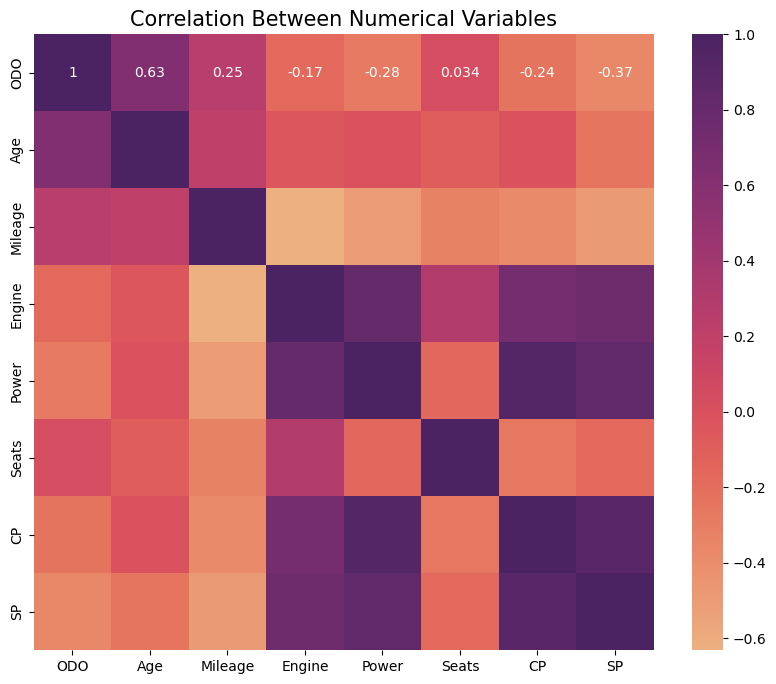

In [67]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.iloc[:, 4:].corr(), cmap='flare', annot=True)
plt.title("Correlation Between Numerical Variables", size=15)
plt.show()

In [68]:
# determinig relevant numerical columns
num_cols = list(df.iloc[:,4:].corr()["CP"][(df.iloc[:,4:].corr()["CP"]>0.75) | (df.iloc[:,4:].corr()["CP"]<-0.75)].index)

# naming categorical columns
cat_cols = ["Location", "Fuel", "Transmission"]

# saving all relevant columns
relevant_cols = cat_cols + num_cols

# reframing data
df = df[relevant_cols]

df.head()

,Location,Fuel,Transmission,Power,CP,SP
0,Islamabad,Petrol,Manual,88.70,11480.0,6000.0
1,Rawalpindi,Diesel,Manual,63.10,6000.0,4666.0
2,Quetta,Diesel,Automatic,171.50,28000.0,23333.0
3,Multan,Petrol,Manual,103.25,14200.0,13266.0
4,Rawalpindi,Diesel,Manual,74.00,10000.0,7466.0


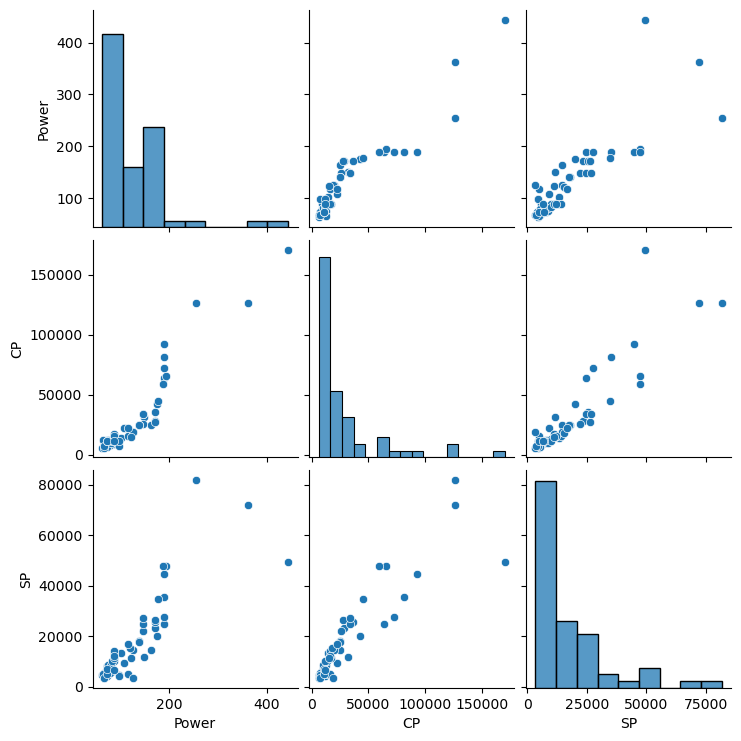

In [69]:
# glancing at data
sns.pairplot(df[relevant_cols])

In [70]:
# feature matrix
X = df.drop('CP', axis=1)

# target variabele
y = df['CP']

In [71]:
X.head()

,Location,Fuel,Transmission,Power,SP
0,Islamabad,Petrol,Manual,88.70,6000.0
1,Rawalpindi,Diesel,Manual,63.10,4666.0
2,Quetta,Diesel,Automatic,171.50,23333.0
3,Multan,Petrol,Manual,103.25,13266.0
4,Rawalpindi,Diesel,Manual,74.00,7466.0


In [72]:
# shape before encoding
print(X.shape)

# encoding
X = pd.get_dummies(X, columns=cat_cols)

# shape after encoding
print(X.shape)

(57, 5)
(57, 17)


In [73]:
X.head()

,Power,SP,Location_Abbottabad,Location_Chitral,Location_Faislabad,Location_Hyderabad,Location_Islamabad,Location_Karachi,Location_Lahore,Location_Multan,Location_Peshawar,Location_Quetta,Location_Rawalpindi,Fuel_Diesel,Fuel_Petrol,Transmission_Automatic,Transmission_Manual
0,88.70,6000.0,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True
1,63.10,4666.0,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True
2,171.50,23333.0,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False
3,103.25,13266.0,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True
4,74.00,7466.0,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True


In [74]:
# new categorical columns
cat_cols = X.iloc[:,2:].columns
cat_cols

Index(['Location_Abbottabad', 'Location_Chitral', 'Location_Faislabad',
       'Location_Hyderabad', 'Location_Islamabad', 'Location_Karachi',
       'Location_Lahore', 'Location_Multan', 'Location_Peshawar',
       'Location_Quetta', 'Location_Rawalpindi', 'Fuel_Diesel', 'Fuel_Petrol',
       'Transmission_Automatic', 'Transmission_Manual'],
      dtype='object')

In [75]:
num_cols = ['Power', 'SP']

In [76]:
# standardizing
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])
X[cat_cols] = X[cat_cols].astype(int)

X.head()

,Power,SP,Location_Abbottabad,Location_Chitral,Location_Faislabad,Location_Hyderabad,Location_Islamabad,Location_Karachi,Location_Lahore,Location_Multan,Location_Peshawar,Location_Quetta,Location_Rawalpindi,Fuel_Diesel,Fuel_Petrol,Transmission_Automatic,Transmission_Manual
0,-0.560453,-0.685018,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
1,-0.927588,-0.765827,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1
2,0.627001,0.364962,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0
3,-0.351788,-0.244866,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1
4,-0.771269,-0.596212,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1


In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=2)

In [78]:
def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

In [79]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score"])

# data processing function for models
def process(model, y_test, predictions):
    # determining error values
    mae, mse, rmse, r_squared = evaluation(y_test, predictions)
    print("Model:", model)
    print("MAE:", mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R2 Score:", r_squared)

    # Create a new DataFrame for the Linear model
    new_row = pd.DataFrame({
        "Model": model,
        "MAE": [mae],
        "MSE": [mse],
        "RMSE": [rmse],
        "R2 Score": [r_squared],
    })

    return new_row;

In [80]:
# Define the hyperparameters
xgb_params = {
    'subsample': 1.0,
    'reg_lambda': 0,
    'n_estimators': 300,
    'reg_alpha': 0.5,
    'max_depth': 4,
    'learning_rate': 0.2,
    'gamma': 1,
    'colsample_bytree': 0.9
}

# Create an XGBoost regressor with specified hyperparameters
xgb = XGBRegressor(**xgb_params)

# Fit the model to the training data
xgb.fit(X_train, y_train)

# Make predictions on the test data
predictions = xgb.predict(X_test)

# Process data for XGBoost Regressor
new_row = process("XG Boost", y_test, predictions)

# Concatenate the new DataFrame to the existing 'models' DataFrame
models = pd.concat([models, new_row], ignore_index=True)

Model: XG Boost
MAE: 4170.376123046875
MSE: 50278283.224643454
RMSE: 7090.718103594548
R2 Score: 0.8534010362954888


In [81]:
# comparing model performance
models

,Model,MAE,MSE,RMSE,R2 Score
0,XG Boost,4170.376123,5.027828e+07,7090.718104,0.853401


In [82]:
# predicting initial cost price
y_pred = xgb.predict(X_test)

# comparing side by side
df_combined = pd.DataFrame({'Actual CP': y_test, 'Predicted CP': y_pred})
df_combined['Predicted CP'] = ((100*(df_combined['Predicted CP'].round(2))).astype(int))/100
df_combined.head(10)

,Actual CP,Predicted CP
44,7053.333333,7915.06
29,25000.000000,25046.21
35,9853.333333,11598.84
51,11120.000000,7993.02
23,36000.000000,32787.63
46,27653.333333,33686.38
28,19253.333333,18403.56
0,11480.000000,8925.25
30,6040.000000,11167.37
1,6000.000000,8816.29


In [83]:
# checking correlation between two columns
correlation = np.corrcoef(y_test, y_pred)[0, 1]
correlation

0.9579248681415151

In [84]:
# importing final test data
final_test = pd.read_csv("test.csv")
final_test.head()

,Car,Location,Fuel,Transmission,ODO,Age,Mileage,Engine,Power,Seats,SP
0,Subaru Forester,Islamabad,Diesel,Manual,87000,12,20.77,1248.0,88.76,7.0,8000.0
1,Volkswagen Vento Diesel Comfortline,Karachi,Diesel,Manual,64430,11,20.54,1598.0,103.60,5.0,6933.0
2,Honda City 1.5 V AT Sunroof,Faislabad,Petrol,Automatic,60000,12,16.80,1497.0,116.30,5.0,5986.0
3,Land Rover Range Rover 2.2L Pure,Hyderabad,Diesel,Automatic,72000,10,12.70,2179.0,187.70,5.0,36000.0
4,Honda Amaze S i-Dtech,Multan,Diesel,Manual,58950,8,25.80,1498.0,98.60,5.0,7200.0


In [85]:
static_test = final_test[["Car", "ODO", "Age", "Mileage", "Engine", "Seats"]]
predict_y = final_test[["Location", "Fuel", "Transmission", "Power", "SP"]]

In [86]:
# encoding
num_cols = ['Power', 'SP']
cat_cols = ["Location", "Fuel", "Transmission"]

predict_y  = pd.get_dummies(predict_y, columns=cat_cols)

predict_y.head()

,Power,SP,Location_Abbottabad,Location_Chitral,Location_Faislabad,Location_Hyderabad,Location_Islamabad,Location_Karachi,Location_Lahore,Location_Multan,Location_Peshawar,Location_Quetta,Location_Rawalpindi,Fuel_Diesel,Fuel_Petrol,Transmission_Automatic,Transmission_Manual
0,88.76,8000.0,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True
1,103.60,6933.0,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True
2,116.30,5986.0,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False
3,187.70,36000.0,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False
4,98.60,7200.0,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True


In [87]:
# taking out new categorical columns
cat_cols = predict_y.iloc[:,2:].columns
cat_cols

Index(['Location_Abbottabad', 'Location_Chitral', 'Location_Faislabad',
       'Location_Hyderabad', 'Location_Islamabad', 'Location_Karachi',
       'Location_Lahore', 'Location_Multan', 'Location_Peshawar',
       'Location_Quetta', 'Location_Rawalpindi', 'Fuel_Diesel', 'Fuel_Petrol',
       'Transmission_Automatic', 'Transmission_Manual'],
      dtype='object')

In [88]:
# normalizing data
scaler = StandardScaler()
predict_y[num_cols] = scaler.fit_transform(predict_y[num_cols])
predict_y[cat_cols] = predict_y[cat_cols].astype(int)

predict_y.head()

,Power,SP,Location_Abbottabad,Location_Chitral,Location_Faislabad,Location_Hyderabad,Location_Islamabad,Location_Karachi,Location_Lahore,Location_Multan,Location_Peshawar,Location_Quetta,Location_Rawalpindi,Fuel_Diesel,Fuel_Petrol,Transmission_Automatic,Transmission_Manual
0,-0.425057,-0.327448,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
1,-0.165789,-0.402089,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
2,0.056091,-0.468336,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
3,1.303511,1.631283,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
4,-0.253144,-0.383411,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1


In [89]:
# predict cost prices
y_pred = xgb.predict(predict_y)

# convert them into dataframe
df_pred = pd.DataFrame({'CP': y_pred})

In [90]:
# rounding to two decimal points
df_pred = ((100*(df_pred['CP'].round(2))).astype(int))/100
df_pred = pd.DataFrame({'CP': df_pred})

In [91]:
# horizontally stacking with main frame
result = pd.concat([final_test, df_pred], axis=1)
result.to_csv('result.csv', index=False)
result.head()

,Car,Location,Fuel,Transmission,ODO,Age,Mileage,Engine,Power,Seats,SP,CP
0,Subaru Forester,Islamabad,Diesel,Manual,87000,12,20.77,1248.0,88.76,7.0,8000.0,15176.57
1,Volkswagen Vento Diesel Comfortline,Karachi,Diesel,Manual,64430,11,20.54,1598.0,103.60,5.0,6933.0,16258.14
2,Honda City 1.5 V AT Sunroof,Faislabad,Petrol,Automatic,60000,12,16.80,1497.0,116.30,5.0,5986.0,18750.41
3,Land Rover Range Rover 2.2L Pure,Hyderabad,Diesel,Automatic,72000,10,12.70,2179.0,187.70,5.0,36000.0,65664.14
4,Honda Amaze S i-Dtech,Multan,Diesel,Manual,58950,8,25.80,1498.0,98.60,5.0,7200.0,15631.57


In [92]:
import pandas as pd
from IPython.display import display, HTML

# Load the data
data = pd.read_csv('result.csv')

# Prepare HTML content
html_content = '<div style="max-width:600px; margin:auto;">'

for index, row in data.iterrows():
    # Format price with two decimal places and dollar sign
    cp_formatted = f"${row['CP']:.2f}"
    sp_formatted = f"${row['SP']:.2f}"
    
    # Create a div for each car with a hover/click event to show details
    html_content += f"""
    <div style="padding: 8px; margin-top: 5px; background-color: #000000; border-radius: 8px; box-shadow: 0 2px 4px rgba(0,0,0,0.1);">
        <p style="margin:0; font-weight:bold; cursor:pointer;" onmouseout="hideDetails()" onclick="showDetails(this)">
            {row['Car']}
        </p>
        <div id="info{index}" style="display:none; padding: 8px; font-size: 14px; color: #333; background-color: #fff; border-left: 4px solid #007BFF; margin-top: 5px;">
            <p>Cost Price: {cp_formatted}</p>
            <p>Selling Price: {sp_formatted}</p>
        </div>
    </div>
    """

html_content += '</div>'

# Adding JavaScript
javascript = """
<script type="text/javascript">
function showDetails(element) {
    var infoDiv = element.nextElementSibling;
    if (infoDiv.style.display === 'none') {
        infoDiv.style.display = 'block';
    } else {
        infoDiv.style.display = 'none';
    }
}
function hideDetails() {
    // Optional: Remove this function if you want the details to stay visible until another click
}
</script>
"""

# Display HTML and JavaScript in the notebook
display(HTML(html_content + javascript))
